In [1]:
!pip install zipcodes

In [2]:
!pip install basemap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipcodes as zcode
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
Data = pd.read_csv('D://D/ماشین لرنینگ/Bank_Personal_Loan_Modelling(1).csv')
Data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df = pd.DataFrame(Data)
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
# convert / to . in notepad++ for ccavg

df.describe(include = 'all')



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Experience can not be negative

df['Experience'] = abs(df['Experience'])

In [8]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [9]:
df['CCAvg']

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64

In [10]:
# ccavg در مورد میانگین ماهیانه هست اما بقیه موارد سالیانه هست پس باید اینم سالیانه کنیم

In [11]:
df['CCAvg'] = df['CCAvg']*12
df['CCAvg']

0       19.2
1       18.0
2       12.0
3       32.4
4       12.0
        ... 
4995    22.8
4996     4.8
4997     3.6
4998     6.0
4999     9.6
Name: CCAvg, Length: 5000, dtype: float64

In [12]:
df.drop('ID', axis=1, inplace = True)

In [13]:
df['ZIPCode'].nunique()

467

In [14]:
# یعنی 467 نقطه مختلف دیتا دارن

In [15]:
# check missing values

In [16]:
df.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [17]:
# Noise

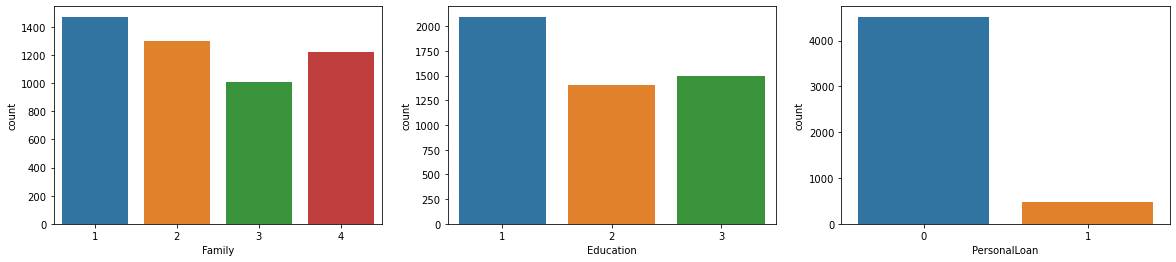

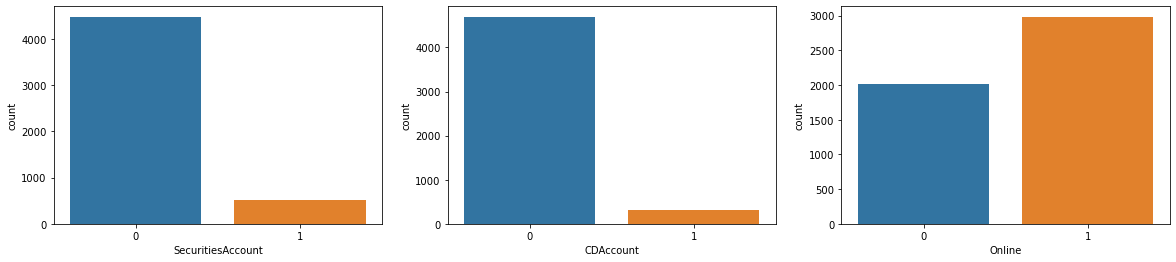

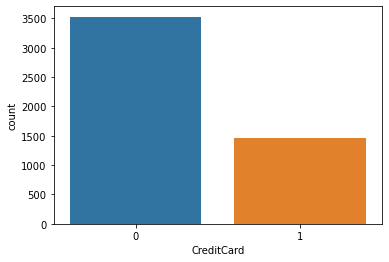

In [18]:
Categorical = ['Family', 'Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']

i = 0
while i < 8:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,3,1)                             # 1 row, 3 plot , first one
    sns.countplot(x = Categorical[i], data = df)   #read each one from data
    i+=1
    if i == 7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i], data = df)  # row one , second plot
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i], data = df)
    i+=1
    plt.show()

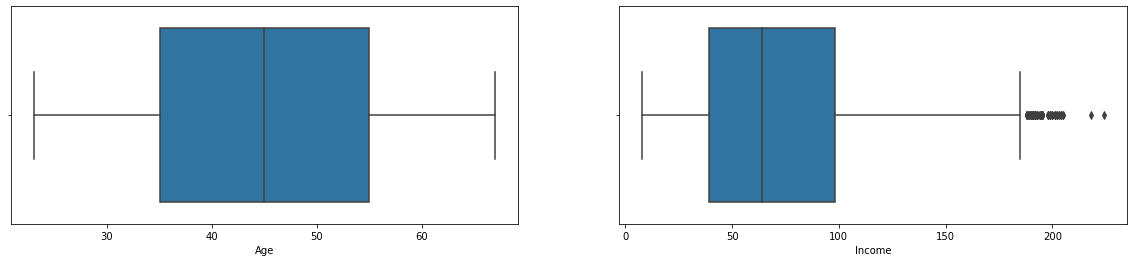

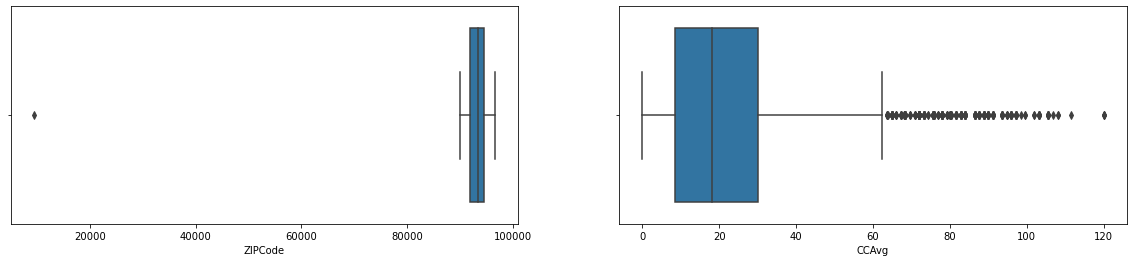

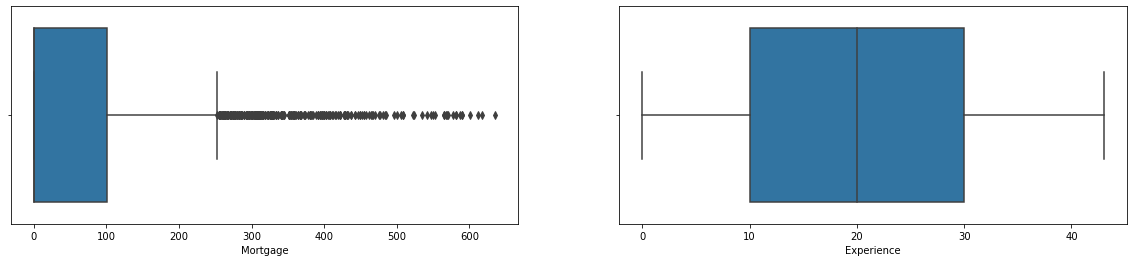

In [19]:
num = ['Age', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Experience']

i = 0
while i<6:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,2,1)                    # one row , 2 plot , first one
    sns.boxplot(x = num[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num[i], data = df)   # row one second plot
    i+=1
    plt.show()

In [20]:
# Zip Code

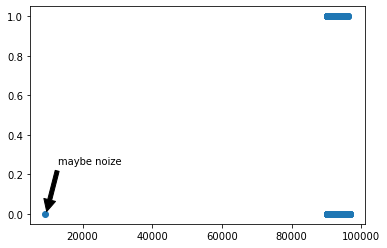

In [21]:
plt.scatter(df['ZIPCode'], df['PersonalLoan'])
plt.annotate('maybe noize', xy = (9500,0), xytext = (13000, 0.25), arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.show()

# the annotate function is in pyplot module of matplotlib library is used to annotate the poin xy with text s.
# xy = نقطه مشکوک ، xytext = جای نوشته
# annotate = حاشیه نویسی

In [22]:
# اون نقطه پرت به دردمون نمیخوره چون میدونیم این دیتاست برای یه جاعه و باید همشون نزدیک هم باشن

In [23]:
noise_zip = df[df['ZIPCode']<20000]
noise_zip

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
384,51,25,21,9307,4,7.2,3,0,0,0,0,1,1


In [24]:
df.drop(index = 384, inplace = True)

In [25]:
list_zipcode = list(df['ZIPCode'])

In [26]:
country = []  # to place countries (لوکیشن)
lat = []      # to latitude of each sample (عرض جغرافیایی)
long = []     # to longitude of each sample (طول جغرافیایی)

for x in list_zipcode :   # this for check each value of zipcode
    my_city_county = zcode.matching(str(x))   #used as zipcode library
    if len (my_city_county) == 1 : # there is information for this zipcode if the value is one
        County = my_city_county[0].get('county')
        Lat = my_city_county[0].get('lat')
        Long = my_city_county[0].get('long')
    else:     # when there are not any information for this zipcode
        County = "not found"
        Lat = np.NaN
        Long = np.NaN
    country.insert(0, County) #insert to end of list
    lat.insert(0, Lat)
    long.insert(0, Long)
country.reverse()
lat.reverse()
long.reverse()
# make new columns
df["Places"] = country
df["Latitude"] = lat
df["Longitude"] = long

In [27]:
print(zcode.matching(str(92612))) # end of sample (searched in google)
df

[{'zip_code': '92612', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Irvine', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Orange County', 'timezone': 'America/Los_Angeles', 'area_codes': ['714', '949'], 'world_region': 'NA', 'country': 'US', 'lat': '33.6615', 'long': '-117.8217'}]


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Places,Latitude,Longitude
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0,Orange County,33.6473,-117.8409
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0,San Diego County,32.8668,-117.2482
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0,Ventura County,34.5210,-119.2477
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0,Los Angeles County,34.0293,-118.3994


In [28]:
df = df.astype({'Longitude' : float, 'Latitude' : float})

In [29]:
df.describe(include = 'all')

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Places,Latitude,Longitude
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999,4966.000000,4966.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN
mean,45.337267,20.133627,73.784757,93169.275455,2.396079,23.258468,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859,NaN,35.792110,-120.037847
std,11.464033,11.416124,46.032281,1759.630610,1.147554,20.972776,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574,NaN,2.098821,2.092821
min,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,32.554700,-124.099400
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,8.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,34.003300,-122.148500
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,35.373600,-120.042400
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,30.000000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,37.748700,-118.089400


In [30]:
# Lat = 4966
# Long = 4966
# places = 4999
# there is 33 missing values

In [31]:
df[df['Places']== "not found"]['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
Name: ZIPCode, dtype: int64

In [32]:
def high_light_cols(s) :
    color = 'yellow'
    return 'background-color: %s'% color

In [33]:
# https://uszipcodesbystate.com/zip/92717

In [34]:
# لینک بالارو سرچ میکنیم و اطلاعاتش رو در کد بعدی وارد می کنیم

In [35]:
z_92717 = list(df[df["ZIPCode"]==92717].index)
for x in z_92717 :
    df["Places"].loc[x] = 'Irvine'
    df["Latitude"].loc[x] = 33.6462
    df["Longitude"].loc[x] = -117.8398
df[df["ZIPCode"]==92717].style.applymap(high_light_cols, subset = pd.IndexSlice[:,['PersonalLoan']])

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Places,Latitude,Longitude
106,43,17,69,92717,4,34.800000,1,0,0,0,0,1,1,Irvine,33.646200,-117.839800
172,38,13,171,92717,2,93.600000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800
184,52,26,63,92717,2,18.000000,2,0,0,1,0,1,0,Irvine,33.646200,-117.839800
321,44,20,101,92717,3,52.800000,2,82,1,0,0,0,0,Irvine,33.646200,-117.839800
366,50,24,35,92717,1,3.600000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
476,60,34,53,92717,1,9.600000,2,0,0,1,0,0,1,Irvine,33.646200,-117.839800
695,29,4,115,92717,1,22.800000,1,0,0,0,0,0,0,Irvine,33.646200,-117.839800
721,49,24,39,92717,1,16.800000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1099,30,6,52,92717,3,8.400000,2,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1189,42,17,115,92717,2,4.800000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800


In [36]:
# دوتا زیپ کد دیگه هم داریم که سرچ میکنیم داده اشو پیدا میکنیم و مثل قبلی جاگذاری می کنیم

In [37]:
z_96651 = list(df[df["ZIPCode"]==96651].index)
for x in z_96651 :
    df["Places"].loc[x] = 'Rudno nad Hronom'
    df["Latitude"].loc[x] = 48.4242
    df["Longitude"].loc[x] = 18.7071
df[df["ZIPCode"]==96651].style.applymap(high_light_cols, subset = pd.IndexSlice[:,['PersonalLoan']])

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Places,Latitude,Longitude
630,32,7,35,96651,3,15.600000,1,108,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
672,51,27,23,96651,1,2.400000,1,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1426,37,11,60,96651,3,6.000000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1653,26,1,24,96651,2,10.800000,3,123,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
2731,29,5,28,96651,1,2.400000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
3525,59,34,13,96651,4,10.800000,2,0,0,0,0,0,0,Rudno nad Hronom,48.424200,18.707100


In [38]:
z_92634 = list(df[df["ZIPCode"]==92634].index)
for x in z_92634 :
    df["Places"].loc[x] = 'Fullerton'
    df["Latitude"].loc[x] = 33.8739
    df["Longitude"].loc[x] = -117.9028
df[df["ZIPCode"]==92634].style.applymap(high_light_cols, subset = pd.IndexSlice[:,['PersonalLoan']])

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Places,Latitude,Longitude
468,34,10,21,92634,1,6.000000,3,0,0,0,0,1,0,Fullerton,33.873900,-117.902800
780,32,7,42,92634,4,9.600000,1,0,0,0,0,1,1,Fullerton,33.873900,-117.902800
2218,38,13,9,92634,2,3.600000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800
3887,24,2,118,92634,2,86.400000,1,0,0,1,0,1,0,Fullerton,33.873900,-117.902800
4392,52,27,81,92634,4,45.600000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800


In [39]:
df_for_maping = df[df["Places"]!= 'Rudno nad Hronom'] # this is for slovaki (noise)

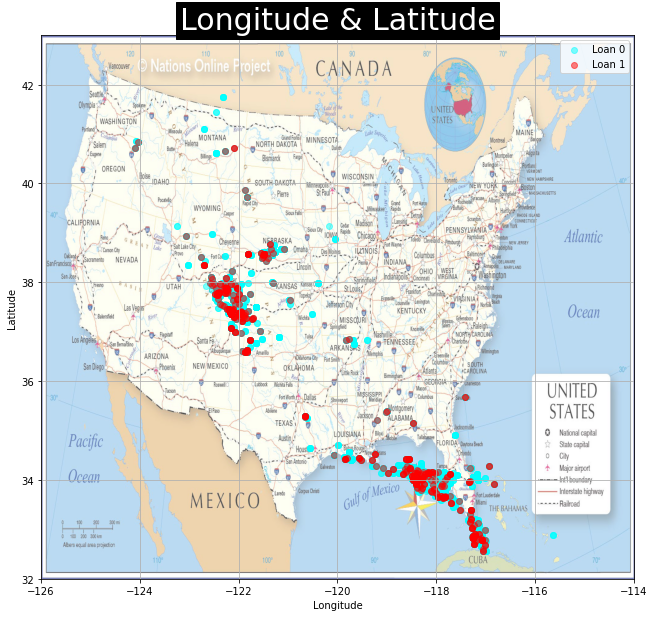

In [40]:
img = plt.imread("D://D/ماشین لرنینگ/map.jpg")
# sepration by personal loan
target_0 = df_for_maping[df_for_maping['PersonalLoan']==0]
target_1 = df_for_maping[df_for_maping['PersonalLoan']==1]
# Plot
fig , axs = plt.subplots(figsize = (15,10)) 
# show img in backgrond
axs.imshow(img, extent = [-126, -114, 32, 43], alpha = 0.7) # با توجه به مختصات قبلی
# scatter plot
axs.scatter(target_0['Longitude'], target_0['Latitude'], c = 'cyan', alpha = 0.5, label = 'Loan 0')
axs.scatter(target_1['Longitude'], target_1['Latitude'], c = 'r', alpha = 0.5, label = 'Loan 1')
plt.title('Longitude & Latitude', fontsize = 30, backgroundcolor = 'black', c = 'white')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [41]:
# عکس باید با مختصات هم خونی داشته باشه بگرد پیدا کن

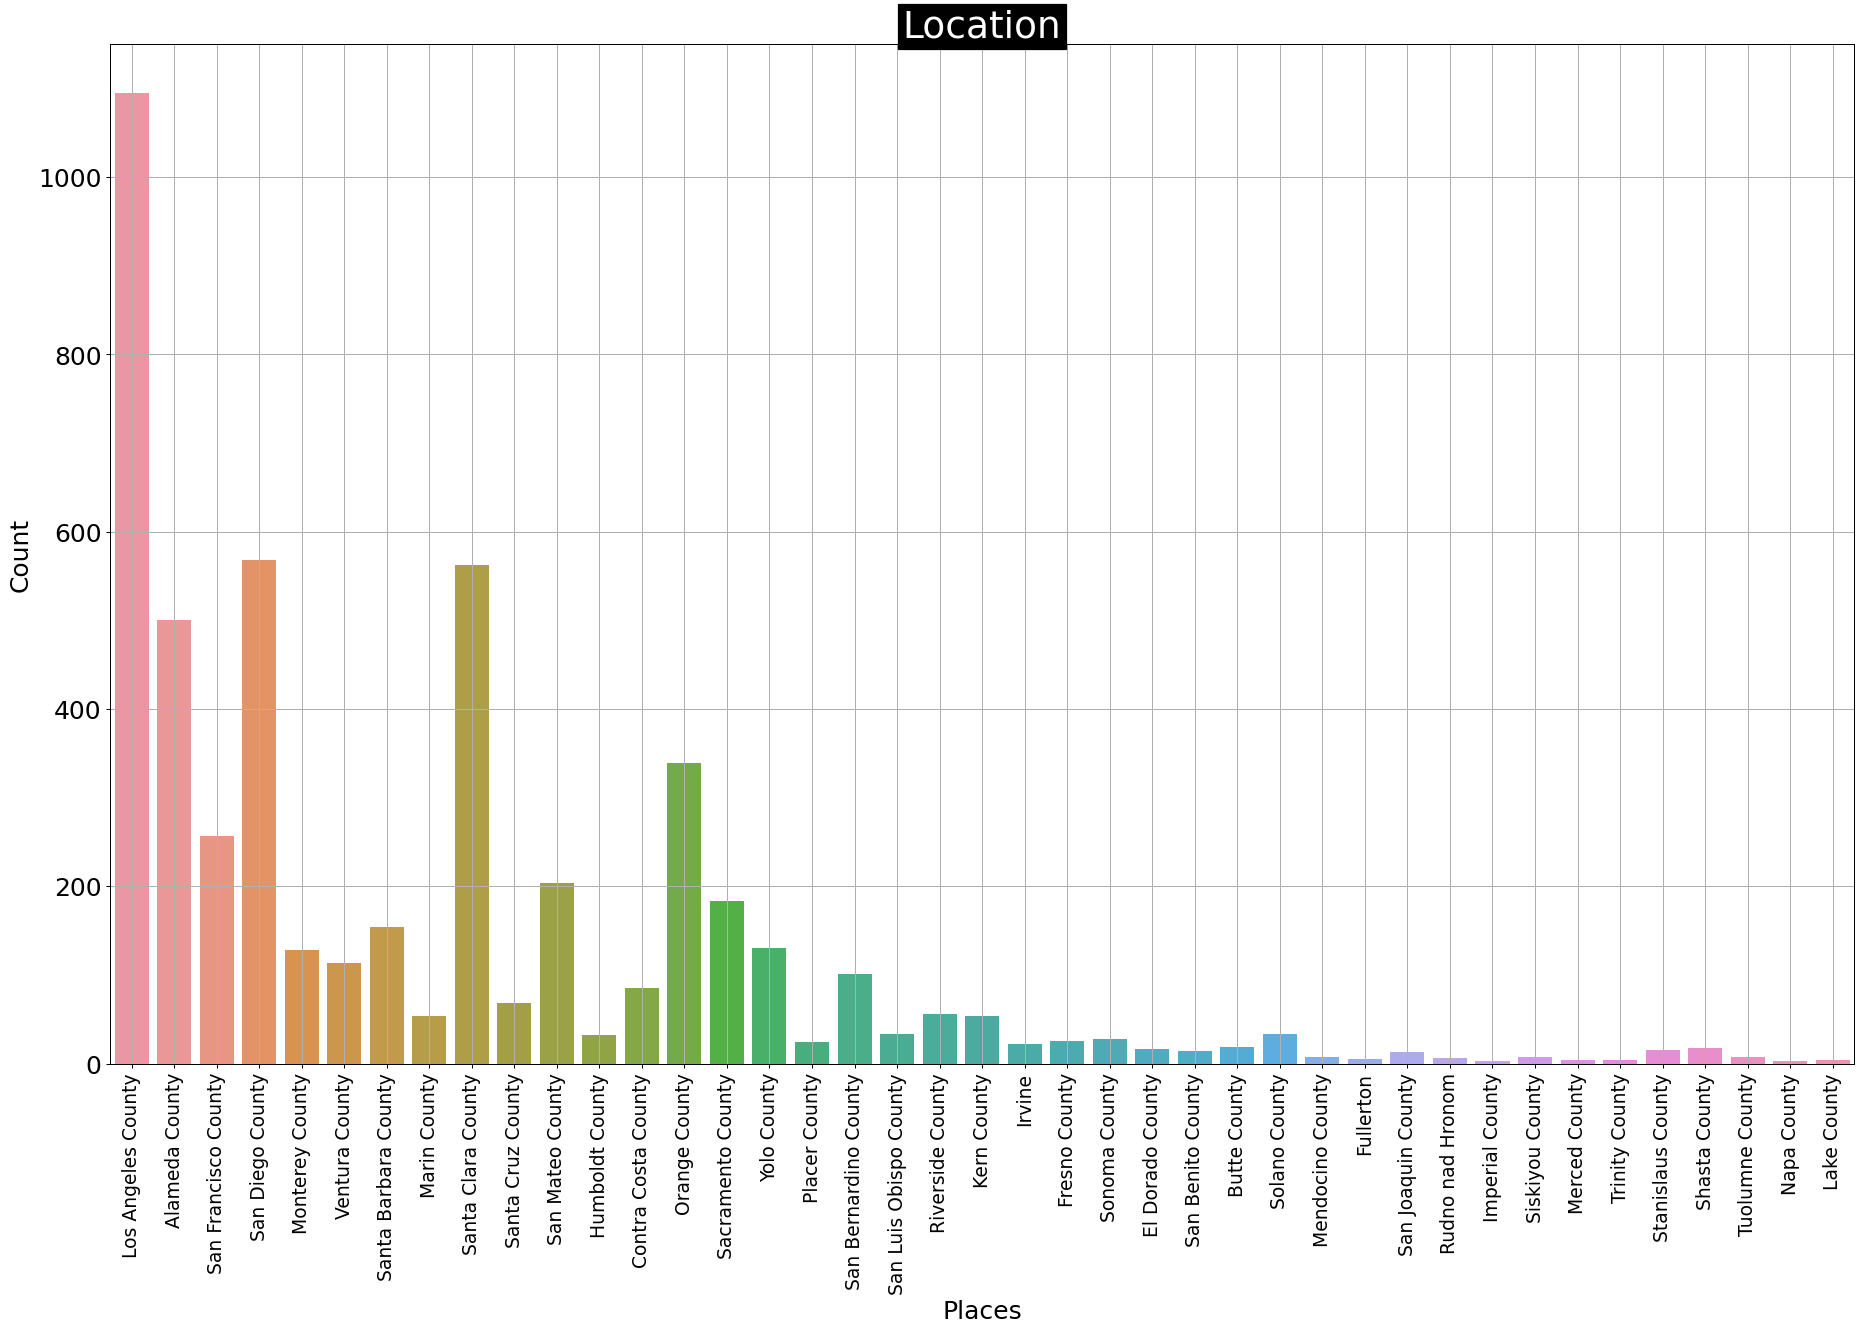

In [42]:
plt.figure(figsize = (25, 15), dpi = 90)
ax = sns.countplot(x = "Places", data = df)
plt.title('Location', fontsize = 30, backgroundcolor = 'black', c = 'white')
plt.grid()
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 20)
plt.xlabel("Places", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.show()

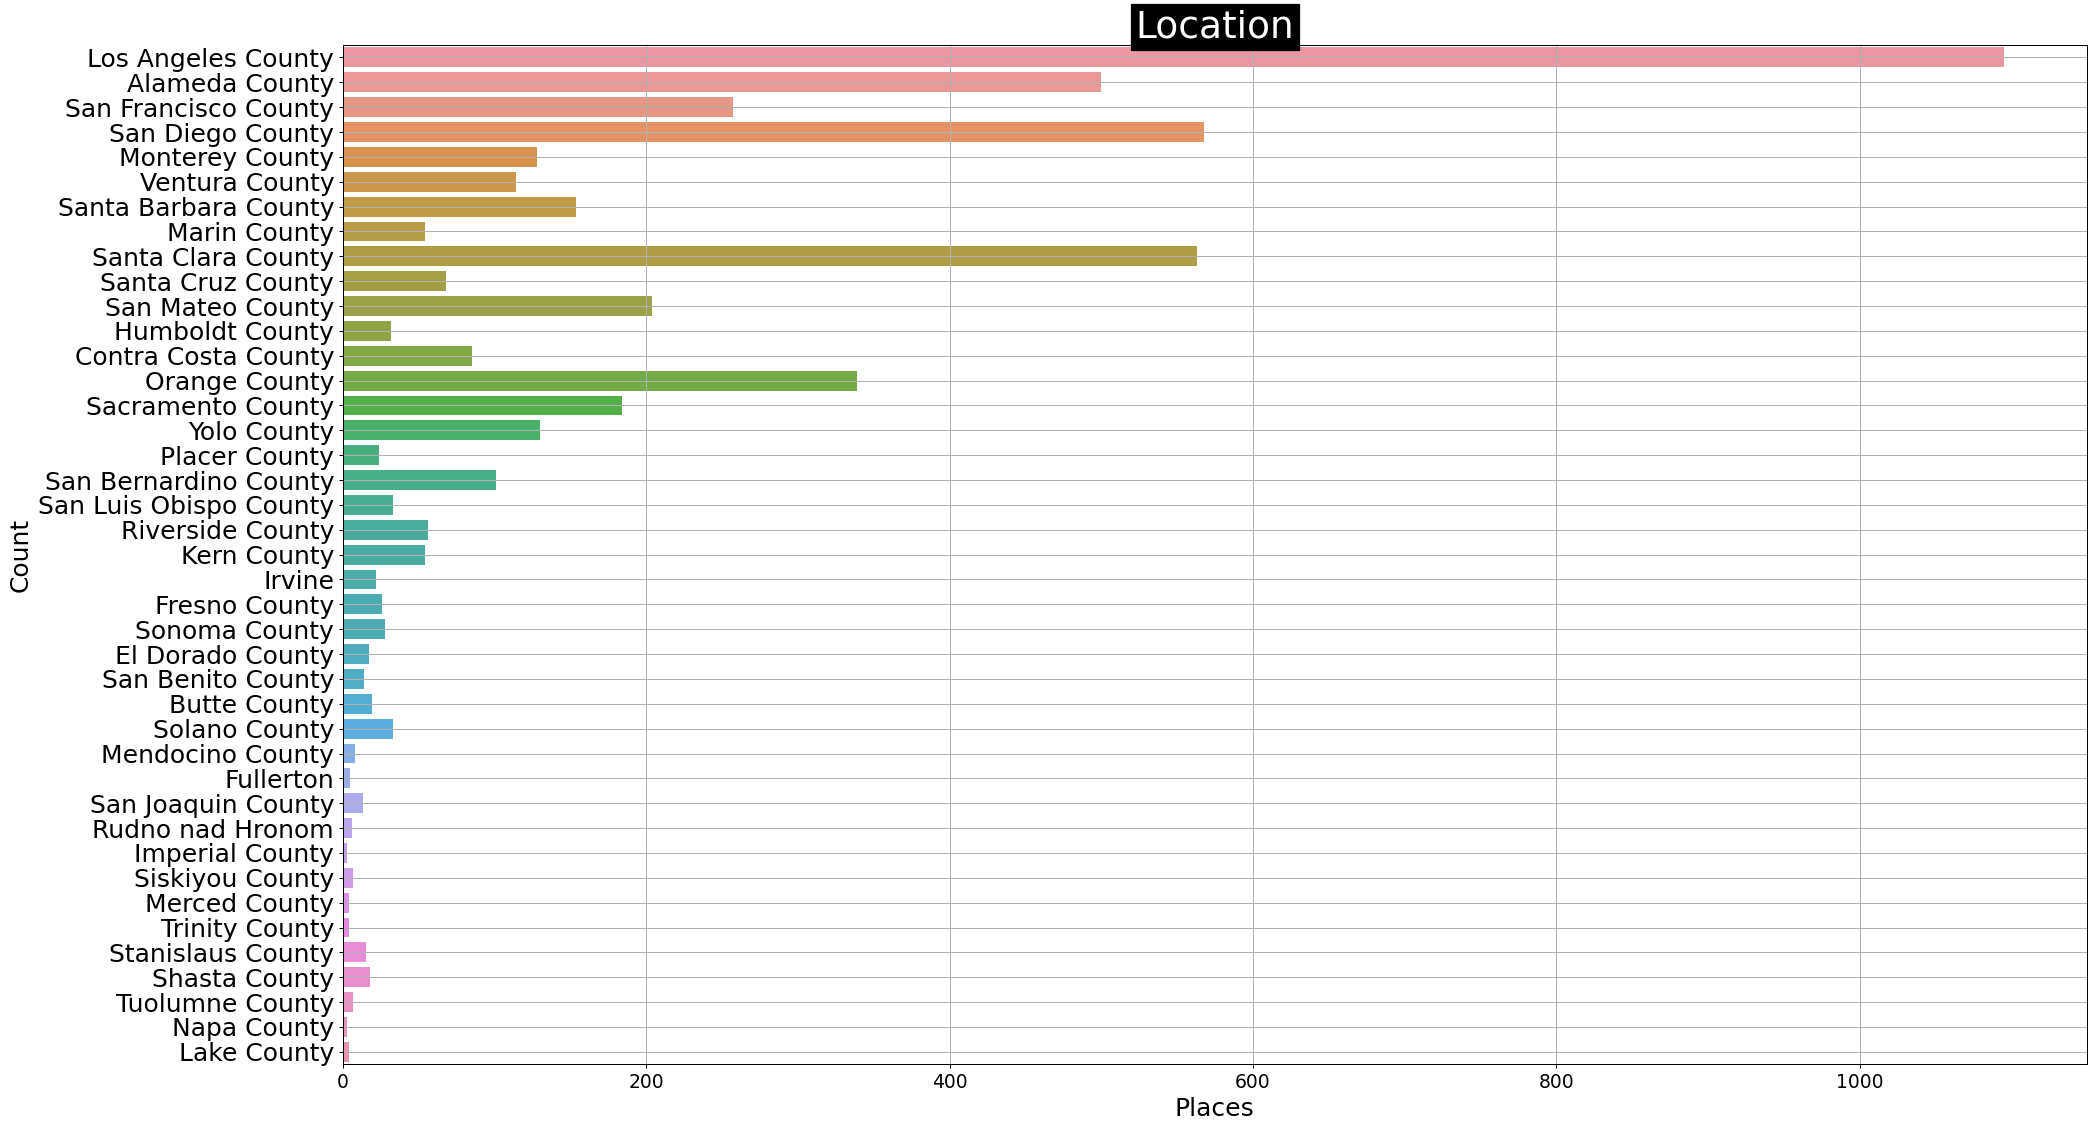

In [43]:
plt.figure(figsize = (25, 15), dpi = 90)
ax = sns.countplot(y = "Places", data = df)
plt.title('Location', fontsize = 30, backgroundcolor = 'black', c = 'white')
plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.xlabel("Places", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.show()

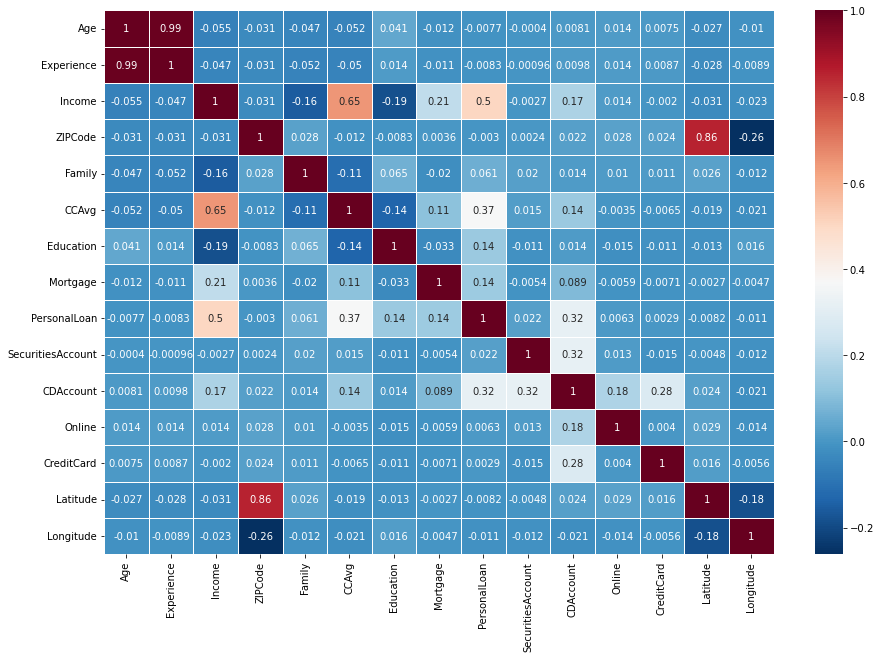

In [45]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(), cmap = 'RdBu_r', cbar = True, annot = True, linewidths = 0.5, ax = ax)
plt.show()

In [46]:
# از روی کورلیشن میتونیم اهمیت هر فیچر رو روی فیچر دیگه بفهمیم
# مثلا اهمیت اینکام روی وام گرفتن بیشتر از همه موارده که 0.5

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

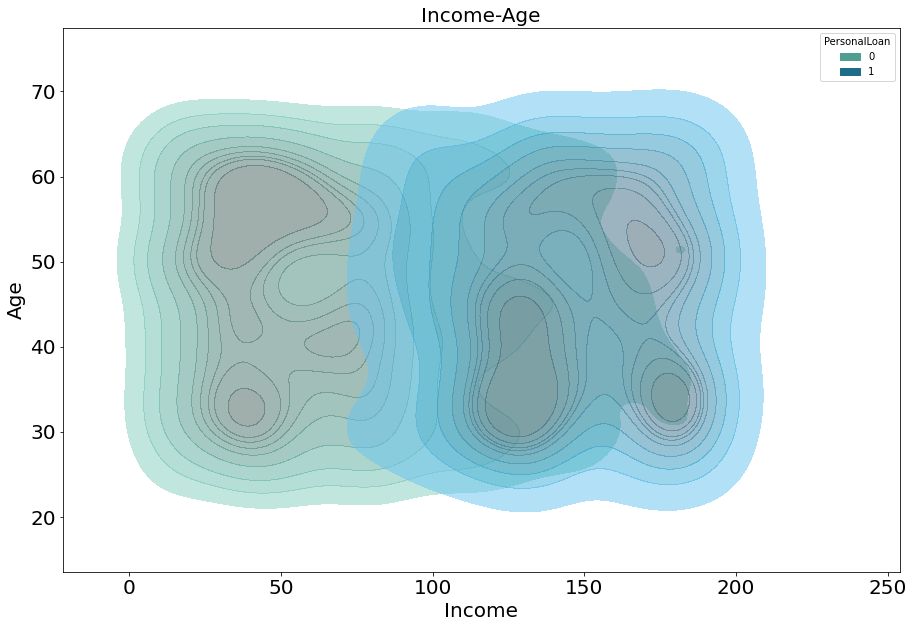

In [52]:
# میخوایم سن و درامد رو همزمان در وام ببینیم

plt.figure(figsize = (15,10))
sns.kdeplot(df['Income'], df['Age'], hue = df["PersonalLoan"], shade = True, fill = True, common_norm = False, palette = "crest", alpha = 0.5, linewidth = 0)
plt.title('Income-Age', fontsize = 20)
plt.xlabel("Income", fontsize = 20)
plt.ylabel("Age", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

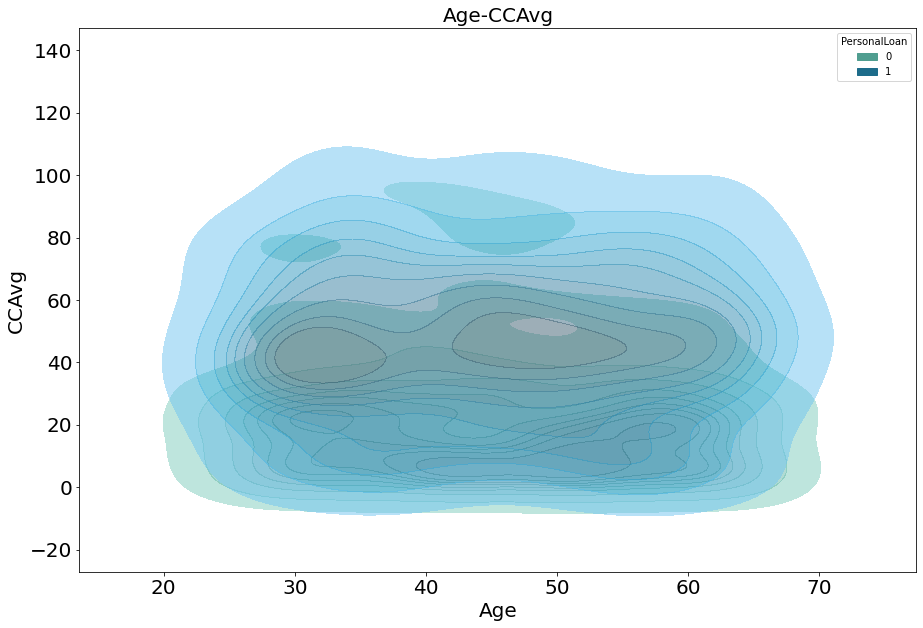

In [53]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Age'], df['CCAvg'], hue = df["PersonalLoan"], shade = True, fill = True, common_norm = False, palette = "crest", alpha = 0.5, linewidth = 0)
plt.title('Age-CCAvg', fontsize = 20)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("CCAvg", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [100]:
x = df.drop(columns = ['PersonalLoan', 'Places'], axis = 1)
y = df.PersonalLoan.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [82]:
#---------------------###############  LogisticRegression  ##############--------------------#

In [83]:
logreg = LogisticRegression(C = 50, solver = 'liblinear')
logreg.fit(x_train, y_train.ravel())
y_pred = logreg.predict(x_test)
print('f1 score is : ', metrics.f1_score(y_test, y_pred))

f1 score is :  0.30985915492957744


In [67]:
def Replace(dataframe):
    dataframe = df.copy()
    dataframe['Education'].replace([1,2,3],[4,5,6], inplace = True)
    dataframe['SecuritiesAccount'].replace([0,1],[3,4], inplace = True)
    dataframe['CDAccount'].replace([0,1],[3,4], inplace = True)
    dataframe['Online'].replace([0,1],[3,4], inplace = True)
    dataframe['CreditCard'].replace([0,1],[3,4], inplace = True)
    return dataframe

In [73]:
# this function take data and test size next get x train x tes y train y test

def Logreg(X,y,Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        logreg = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        dict = {'Test_size' : x, 'acc' : metrics.accuracy_score(y_test,y_pred), "score" : logreg.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test,df_evaluation)
# this function highlight max values
#def highlight_max(s):
 #   is_max = s == s.max()
  #  return('background-color: yellow' if v else '' for v in is_max)

In [74]:
df_r = Replace(df)
x = df_r.drop(columns = ['PersonalLoan', 'Places'])
y = df_r['PersonalLoan']

In [76]:
X_train, X_test, y_train, y_test, df_evaluation = Logreg(x,y,[0.1,0.15,0.2,0.25,0.3])
#df_evaluation.style.apply(highlight_max)
df_evaluation

,Test_size,acc,score
0,0.10,0.894000,0.895579
1,0.15,0.898667,0.896179
2,0.20,0.908000,0.894579
3,0.25,0.902400,0.892178
4,0.30,0.898000,0.894979


In [71]:
# نمی دونم مشکل چیه؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟؟

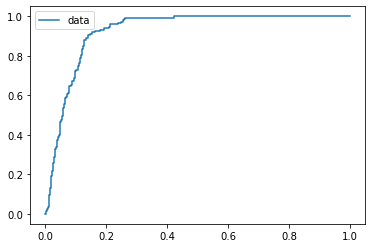

In [84]:
y_pred_proba = logreg.predict_proba(x_test)[: : ,1]
fpr , tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data")
plt.legend(loc = 2)
plt.show()

In [85]:
confusion_matrix(y, logreg.predict(x))

array([[4400,  119],
       [ 351,  129]], dtype=int64)

In [86]:
solves = ['liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs']

In [87]:
def Logreg(X,y,Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        logreg = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        dict = {'Test_size' : x, 'acc' : metrics.accuracy_score(y_test,y_pred), "score" : logreg.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test,df_evaluation)

In [88]:
df_r = Replace(df)
x = df_r.drop(columns = ['PersonalLoan', 'Places'])
y = df_r['PersonalLoan']
X_train, X_test, y_train, y_test, df_evaluation = Logreg(x,y,[0.1,0.15,0.2,0.25,0.3])
df_evaluation

,Test_size,acc,score
0,0.10,0.902000,0.898380
1,0.15,0.906667,0.898580
2,0.20,0.915000,0.896379
3,0.25,0.908000,0.895579
4,0.30,0.901333,0.899180


In [89]:
def Logreg(X,y,Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        logreg = LogisticRegression(solver = 'sag', class_weight = 'balanced')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        dict = {'Test_size' : x, 'acc' : metrics.accuracy_score(y_test,y_pred), "score" : logreg.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test,df_evaluation)

In [90]:
df_r = Replace(df)
x = df_r.drop(columns = ['PersonalLoan', 'Places'])
y = df_r['PersonalLoan']
X_train, X_test, y_train, y_test, df_evaluation = Logreg(x,y,[0.1,0.15,0.2,0.25,0.3])
df_evaluation

,Test_size,acc,score
0,0.10,0.760000,0.775755
1,0.15,0.858667,0.860772
2,0.20,0.101000,0.096019
3,0.25,0.900800,0.896179
4,0.30,0.858667,0.867974


In [91]:
def Logreg(X,y,Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        logreg = LogisticRegression(solver = 'saga', class_weight = 'balanced')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        dict = {'Test_size' : x, 'acc' : metrics.accuracy_score(y_test,y_pred), "score" : logreg.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test,df_evaluation)

In [92]:
df_r = Replace(df)
x = df_r.drop(columns = ['PersonalLoan', 'Places'])
y = df_r['PersonalLoan']
X_train, X_test, y_train, y_test, df_evaluation = Logreg(x,y,[0.1,0.15,0.2,0.25,0.3])
df_evaluation

,Test_size,acc,score
0,0.10,0.9020,0.903981
1,0.15,0.2360,0.224845
2,0.20,0.1010,0.096019
3,0.25,0.2192,0.208842
4,0.30,0.8860,0.887578


In [93]:
def Logreg(X,y,Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        logreg = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        dict = {'Test_size' : x, 'acc' : metrics.accuracy_score(y_test,y_pred), "score" : logreg.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test,df_evaluation)

In [94]:
df_r = Replace(df)
x = df_r.drop(columns = ['PersonalLoan', 'Places'])
y = df_r['PersonalLoan']
X_train, X_test, y_train, y_test, df_evaluation = Logreg(x,y,[0.1,0.15,0.2,0.25,0.3])
df_evaluation

,Test_size,acc,score
0,0.10,0.862000,0.857772
1,0.15,0.862667,0.861572
2,0.20,0.873000,0.862172
3,0.25,0.869600,0.857572
4,0.30,0.869333,0.857972


In [95]:
# newton-cg is the best

In [96]:
# GridSearch

In [104]:
from sklearn.model_selection import KFold
logreg2 = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced', max_iter = 5000, n_jobs = -1)
params = {'penalty':['12','none'], 'C':[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200],
         'class_weight':[None, 'balanced'], 'warm_start':[False, True]}
Kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
gridsearch = GridSearchCV(logreg2, param_grid = params, scoring = 'f1',n_jobs = -1, cv = Kfold)

In [105]:
gridsearch.fit(x_train, y_train)

ValueError: Invalid parameter c for estimator LogisticRegression(class_weight='balanced', max_iter=5000, n_jobs=-1,
                   solver='newton-cg'). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

In [106]:
# Do thid for another solver whit another classweight

In [107]:
#------------------------###########  KNN ############-------------------------#

In [111]:
x1 = df.drop(columns = ['PersonalLoan', 'Places'], axis = 1)
y1 = df.PersonalLoan.values.reshape(-1, 1)
x1_test, x1_train, y1_test, y1_train = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

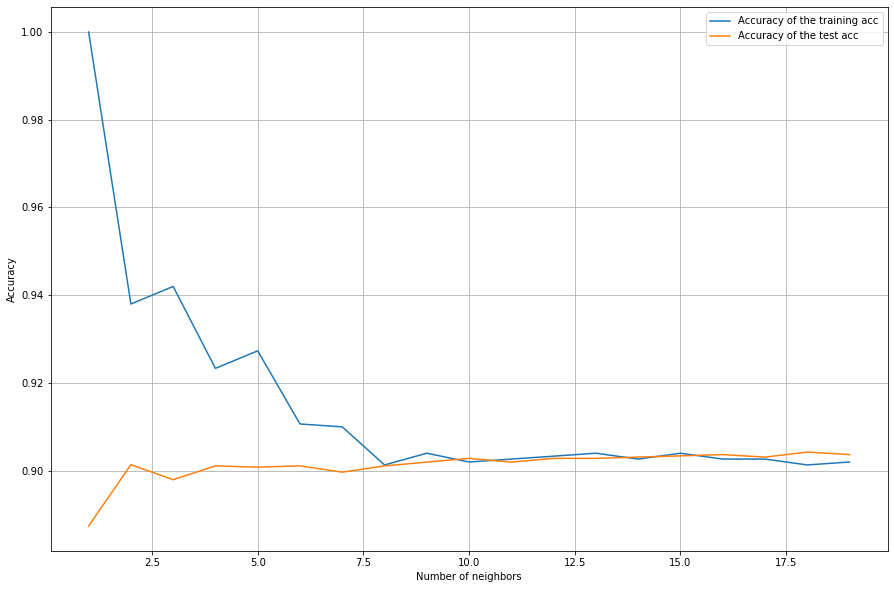

In [112]:
training_acc = []
test_acc = []  #creat 2 empty list

#try KNN for diffrent k_neighbors from 1 to 20

neighbors_setting = range(1,20)
for i in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x1_train, y1_train.ravel())
    training_acc.append(knn.score(x1_train, y1_train))
    test_acc.append(knn.score(x1_test, y1_test))

plt.figure(figsize = (15,10))    
plt.plot(neighbors_setting, training_acc, label ='Accuracy of the training acc')
plt.plot(neighbors_setting, test_acc, label ='Accuracy of the test acc')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [114]:
print(np.max(test_acc))
print(np.min(test_acc))

0.9042583595312946
0.8873963989711346


In [115]:
KNN_model = KNeighborsClassifier(n_neighbors = 9)
KNN_model.fit(x1_train, y1_train.ravel())

KNeighborsClassifier(n_neighbors=9)

In [118]:
confusion_matrix(y, KNN_model.predict(x))

array([[4477,   42],
       [ 445,   35]], dtype=int64)

In [125]:
df['PersonalLoan'].value_counts()

0    4519
1     480
Name: PersonalLoan, dtype: int64

In [126]:
4519/480

9.414583333333333